# BrightPath Academy Student Performance Analysis

## 1. Problem Statement

BrightPath Academy needs to identify at-risk students early, understand factors affecting academic performance, and develop targeted intervention strategies. The goal is to build predictive models that can classify students into performance categories (GradeClass) based on their demographic, study habit, parental involvement, and extracurricular activity data.

Key challenges to address:
- Early identification of students at risk of poor academic performance
- Understanding which factors most strongly influence student performance
- Developing actionable insights for targeted interventions

## 2. Hypothesis Generation

Based on the problem statement, we generate the following hypotheses:

1. Students with higher parental education levels will have better academic performance.
2. Increased weekly study time correlates with higher GPA.
3. Students who participate in extracurricular activities will show better academic performance.
4. Higher parental support leads to better student outcomes.
5. Students receiving tutoring will show improved performance compared to those who don't.
6. Increased absenteeism negatively impacts academic performance.
7. Certain extracurricular activities (like music) may correlate more strongly with academic success than others.

## 3. Getting the System Ready and Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from collections import Counter
import os
from pathlib import Path

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

base_dir = os.path.dirname(os.path.abspath("__file__"))  # Current working directory
data_path = os.path.join(base_dir, "..", "data", "Student_performance_data .csv")
df = pd.read_csv(data_path)

print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


Data shape: (2392, 15)

First 5 rows:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Understanding the Data

In [2]:
print("Data Information:")
print(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution (GradeClass):")
print(df['GradeClass'].value_counts())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000



Missing Values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Target Variable Distribution (GradeClass):
GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


## Exploratory Data Analysis

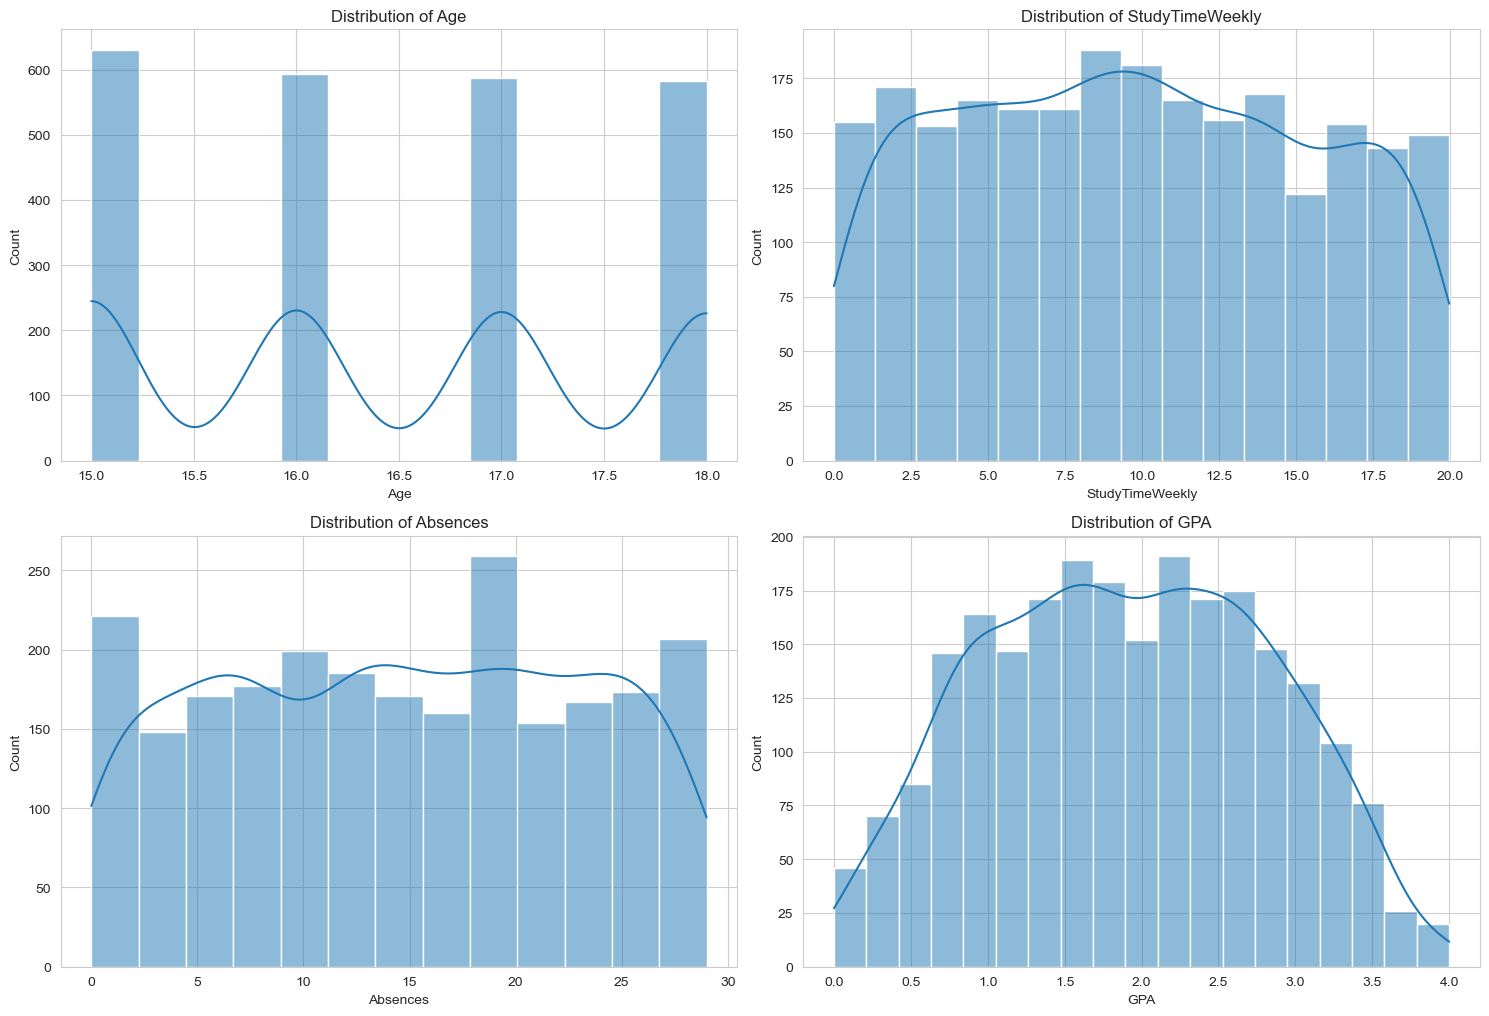

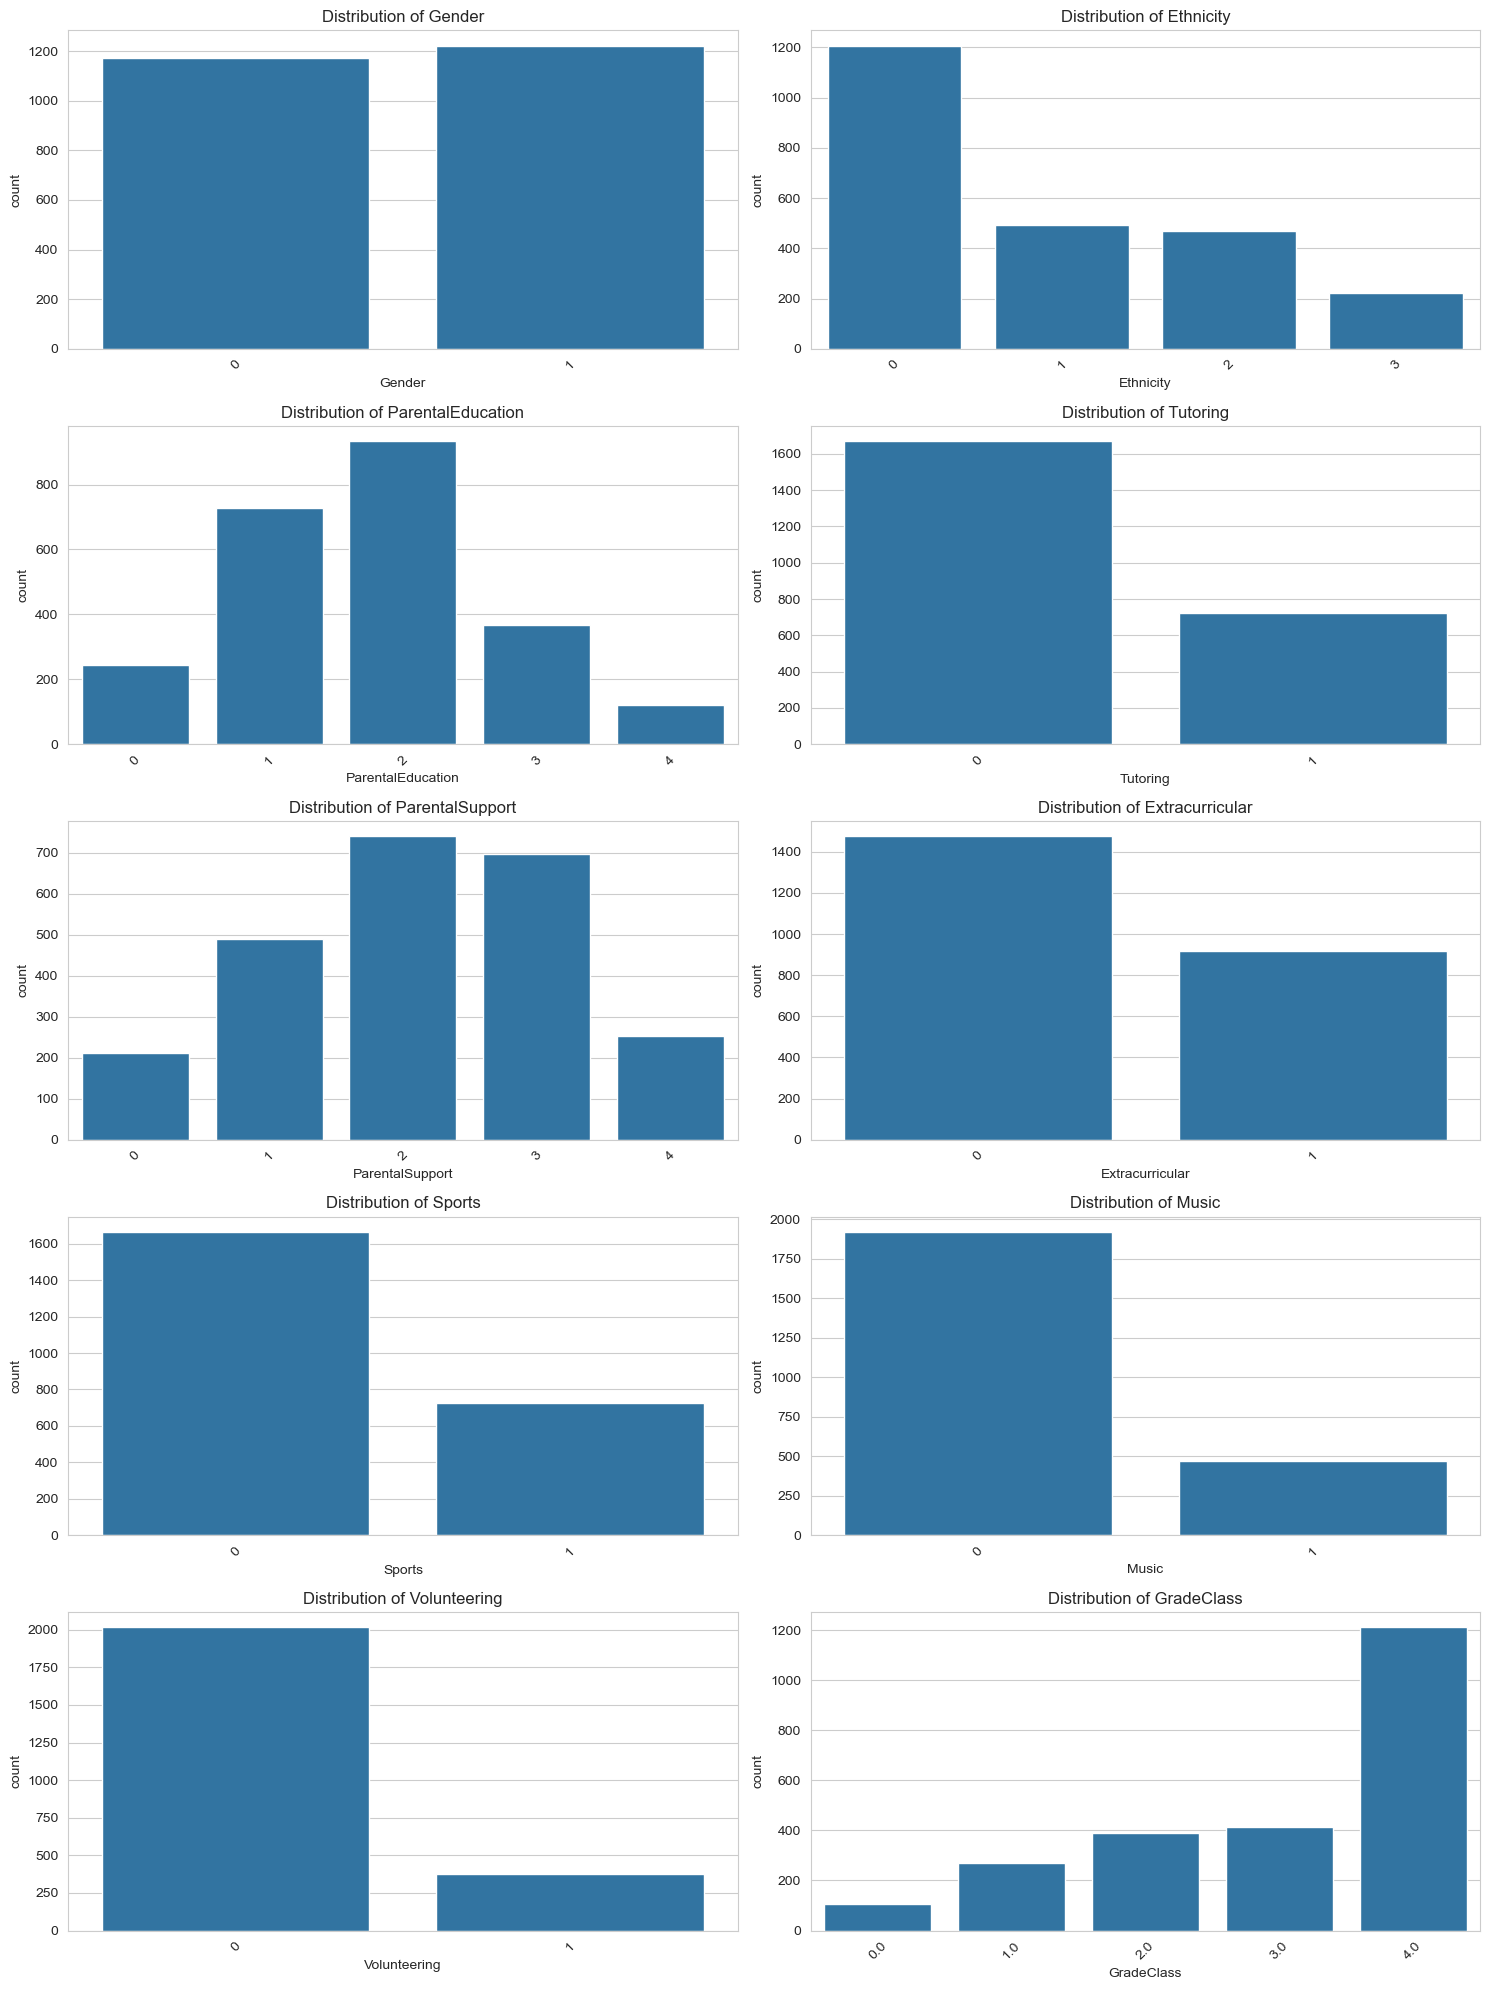

In [3]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 20))

# Plot distributions for numerical variables
num_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

# Plot distributions for categorical variables
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
            'ParentalSupport', 'Extracurricular', 'Sports', 
            'Music', 'Volunteering', 'GradeClass']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

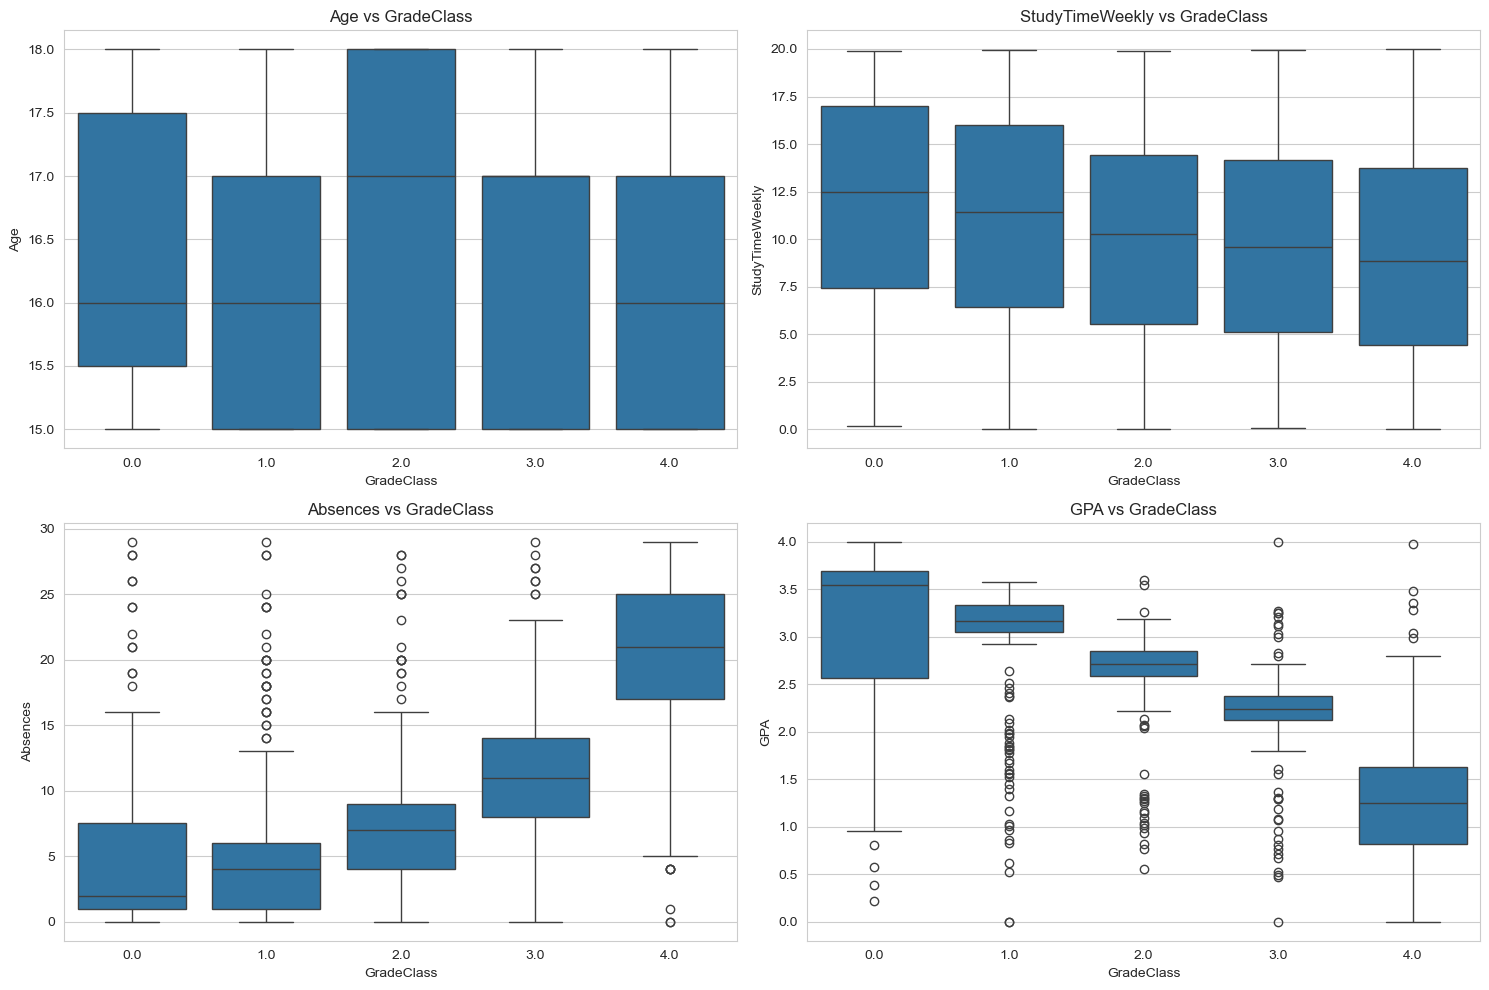

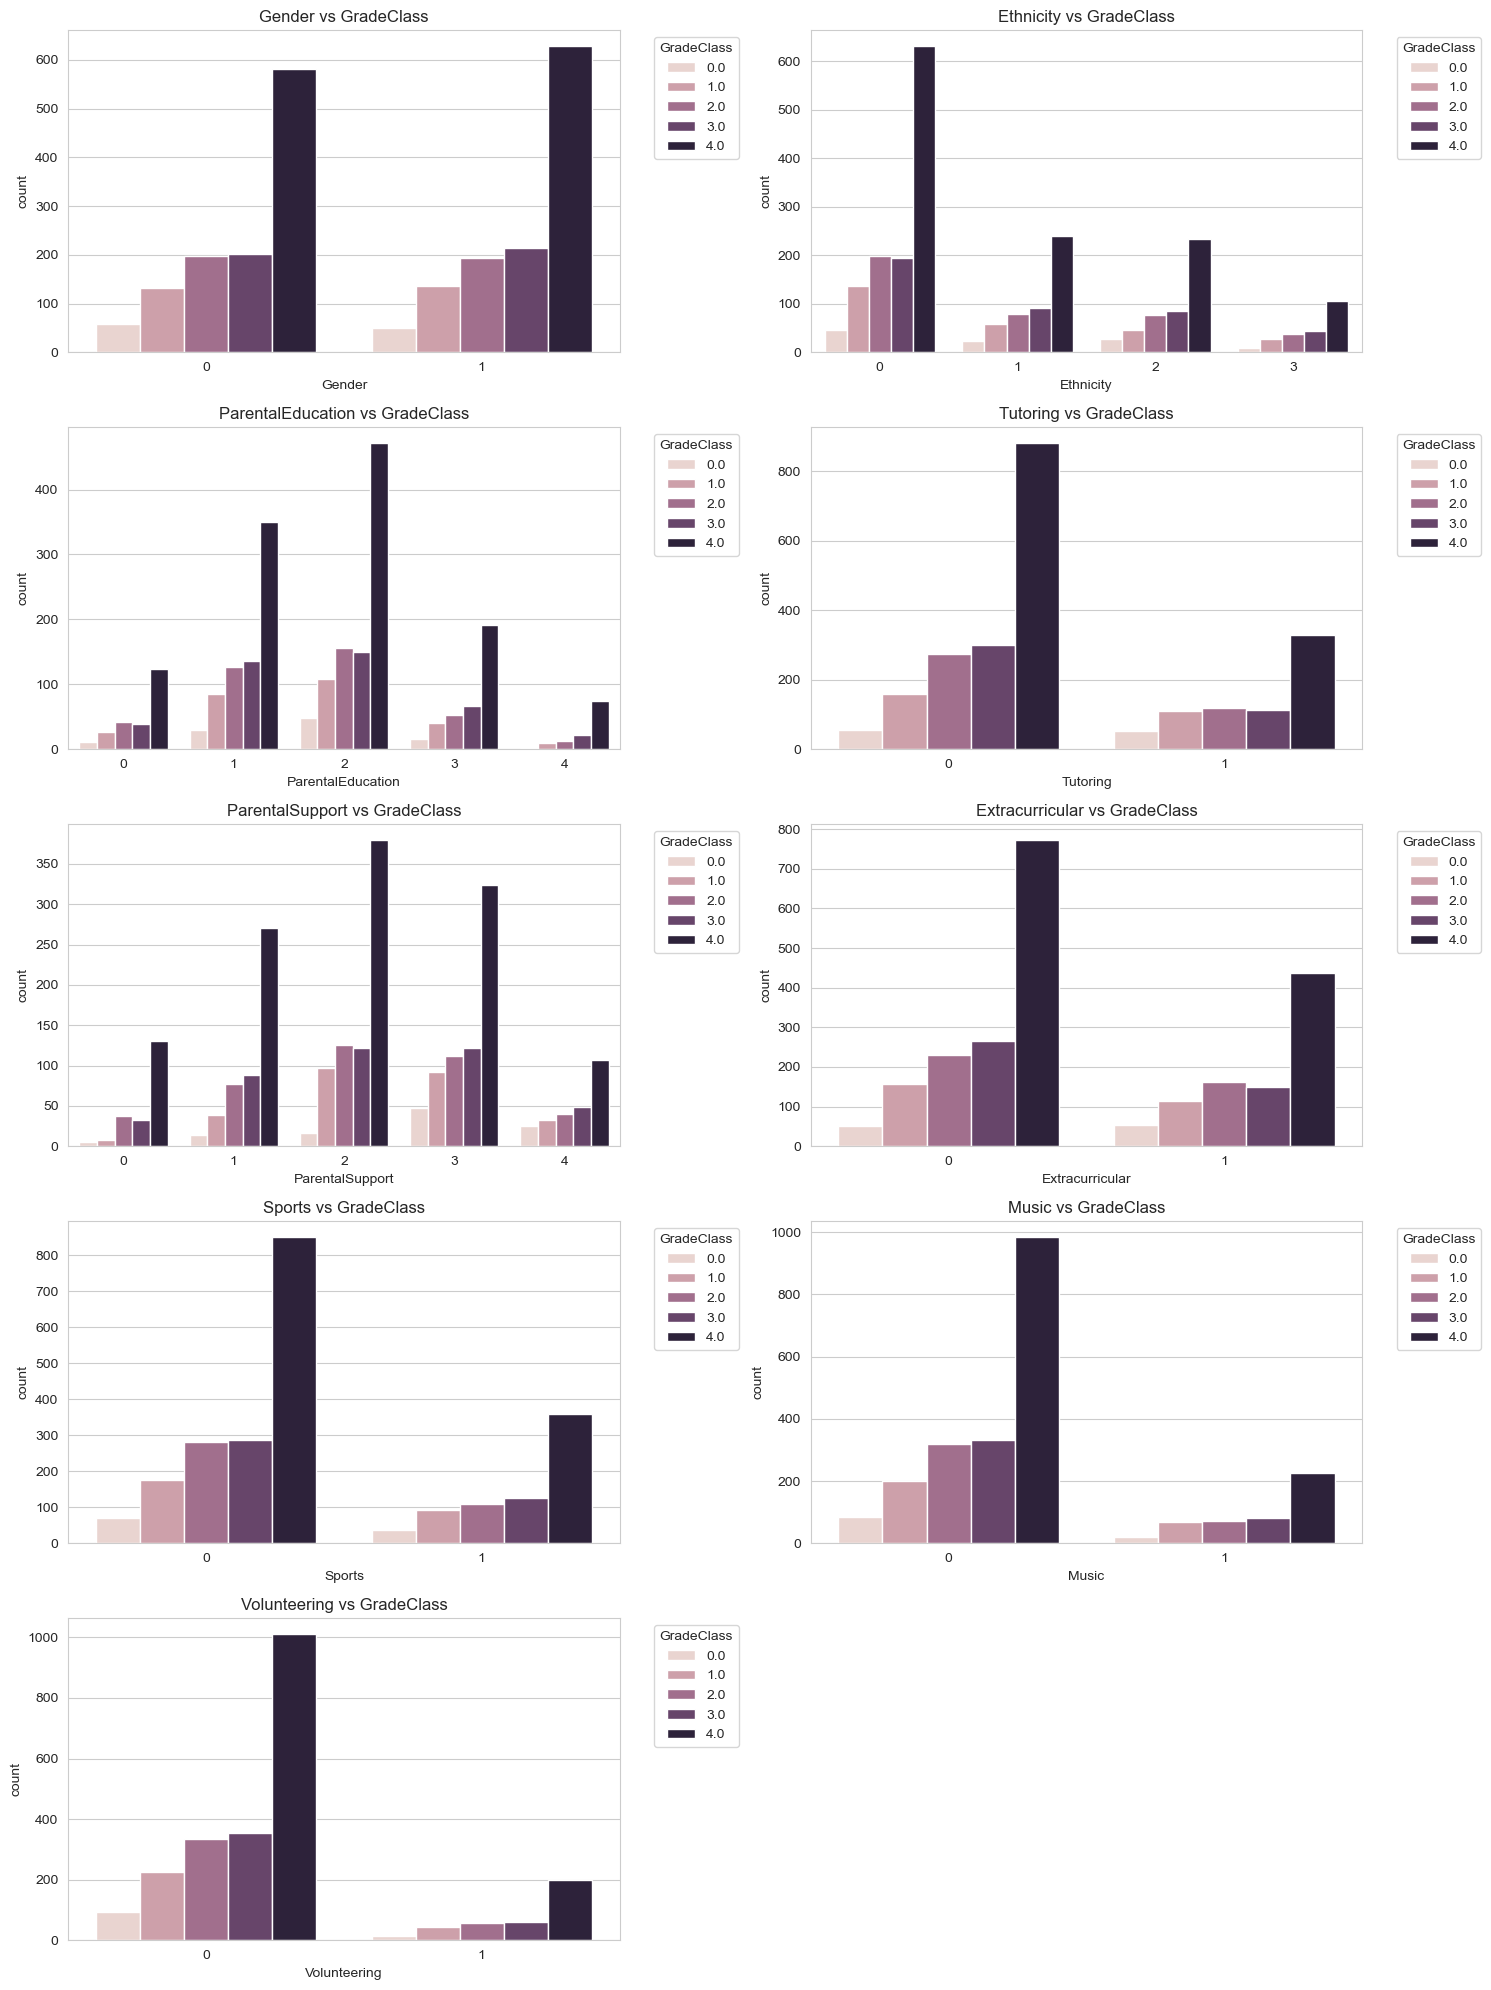

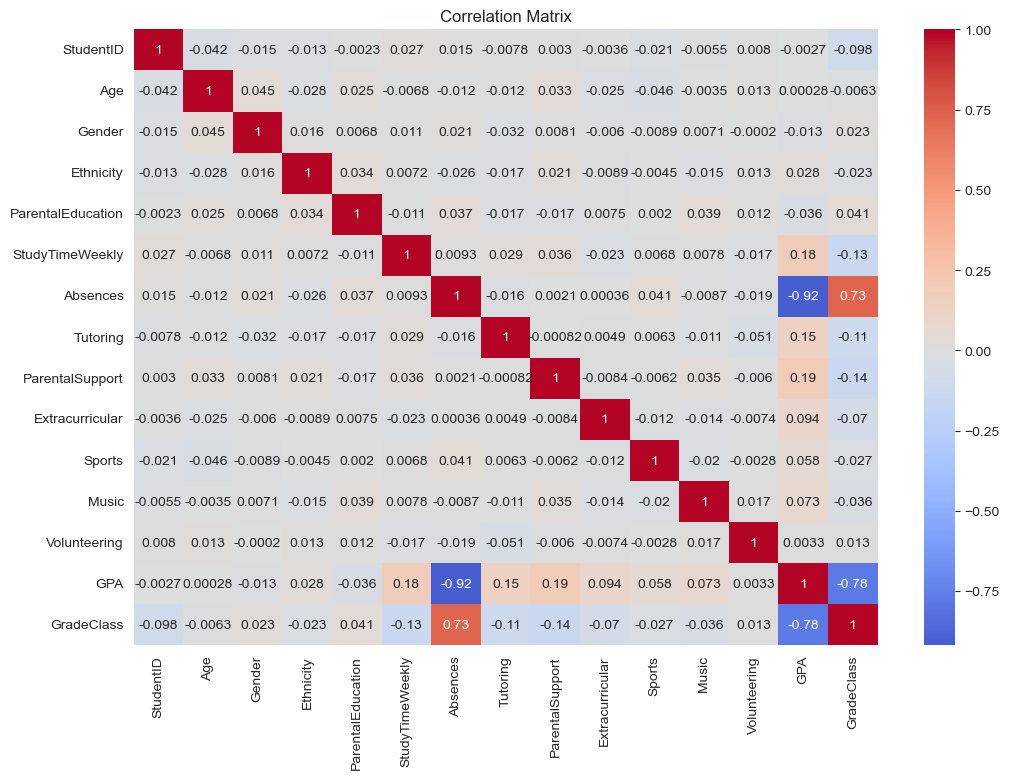

In [4]:
# Numerical features vs GradeClass
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='GradeClass', y=col)
    plt.title(f'{col} vs GradeClass')
    
plt.tight_layout()
plt.show()

# Categorical features vs GradeClass
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols[:-1], 1):  # Exclude GradeClass itself
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='GradeClass')
    plt.title(f'{col} vs GradeClass')
    plt.legend(title='GradeClass', bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Missing Value and Outlier Treatment

Missing values before treatment:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


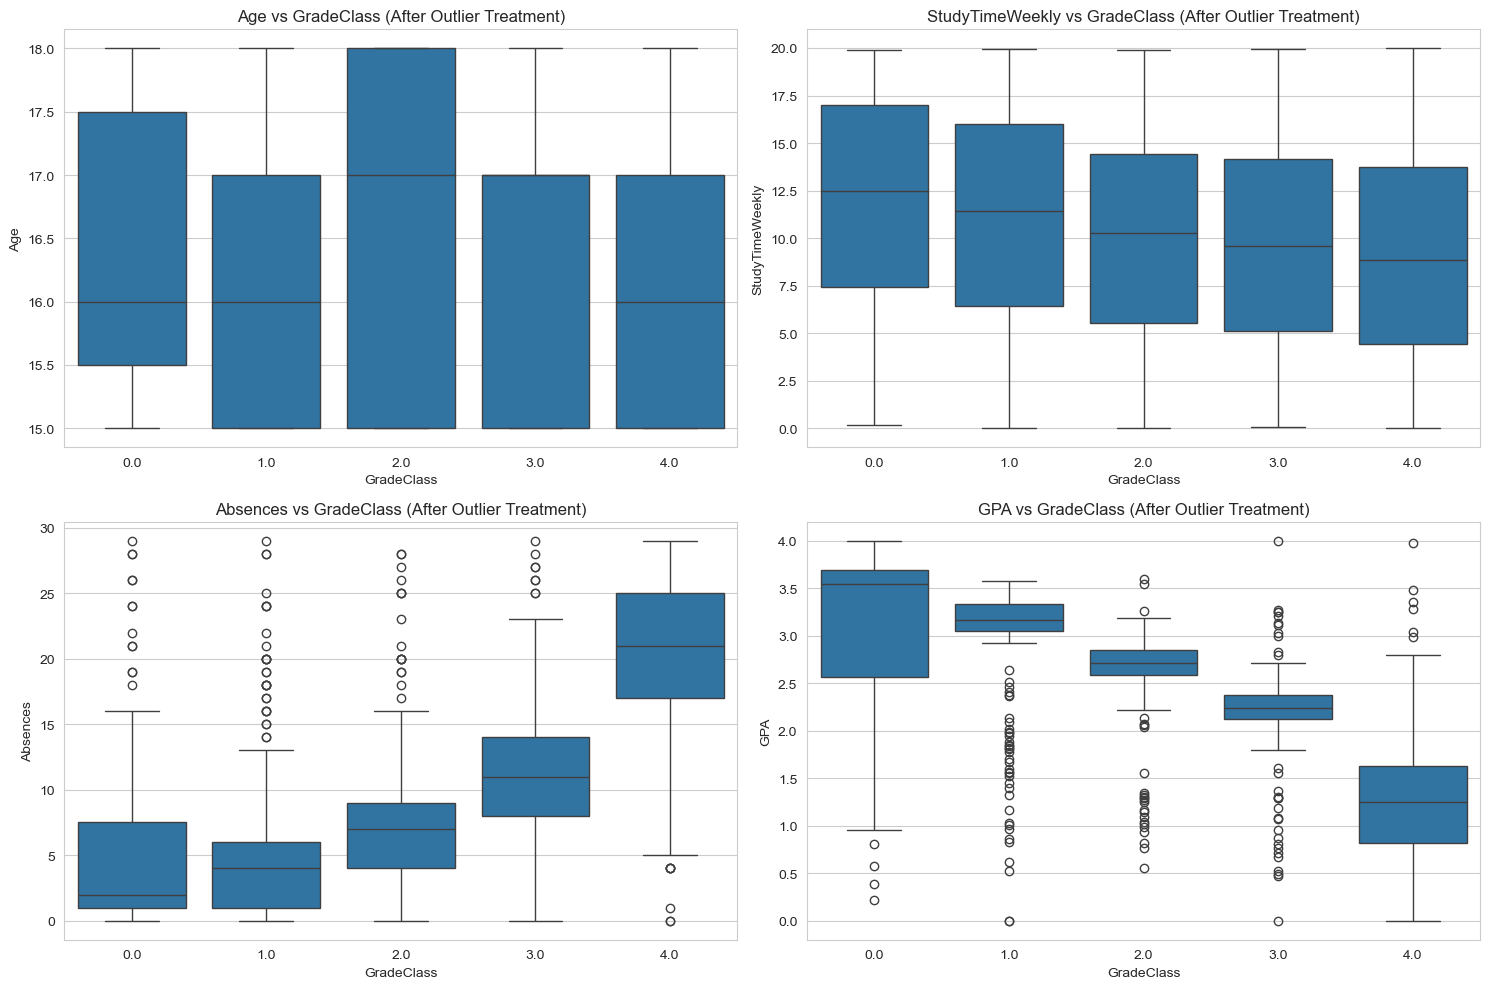

In [5]:
# Check for missing values
print("Missing values before treatment:")
print(df.isnull().sum())


# Outlier treatment for numerical variables
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, 
                      np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

# outlier treatment to numerical columns
for col in num_cols:
    df = treat_outliers(df, col)

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='GradeClass', y=col)
    plt.title(f'{col} vs GradeClass (After Outlier Treatment)')
    
plt.tight_layout()
plt.show()

## Evaluation Metrics for Classification Problem

For our multi-class classification problem (GradeClass 0-4), we'll use:

    Accuracy: Overall correctness of the model

    Precision: Ability to not label a negative sample as positive

    Recall: Ability to find all positive samples

    F1-score: Harmonic mean of precision and recall

Confusion Matrix: Detailed breakdown of correct and incorrect classifications

## Feature Engineering

In [6]:
#Sum of all activies done by student 0 - 4
df['TotalActivities'] = df['Extracurricular'] + df['Sports'] + df['Music'] + df['Volunteering']

df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'], drop_first=True)


## Splitting data

In [8]:
# Define features and target - EXCLUDE GPA FROM FEATURES
X = df.drop(['StudentID', 'GradeClass', 'GPA'], axis=1)  # Remove GPA
y = df['GradeClass']

# class distribution
print("Class distribution:", Counter(y))

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_res))
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale numerical features 
num_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'TotalActivities'] 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

notebook_path = Path().resolve()
train_path = notebook_path.parent / "data" / 'train.csv'
test_path = notebook_path.parent / "data" / 'test.csv'

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)


train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

Class distribution: Counter({4.0: 1211, 3.0: 414, 2.0: 391, 1.0: 269, 0.0: 107})
Class distribution after SMOTE: Counter({2.0: 1211, 1.0: 1211, 4.0: 1211, 3.0: 1211, 0.0: 1211})


## Model Building: Part 1 (Baseline ML Models)

In [9]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,...,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,1001,17.0,19.833723,7.0,1,0,0,1,0,2.929196,...,False,False,False,True,False,False,False,True,False,False
1,1002,18.0,15.408756,0.0,0,0,0,0,0,3.042915,...,False,False,True,False,False,False,True,False,False,False
2,1003,15.0,4.210570,26.0,0,0,0,0,0,0.112602,...,True,False,False,False,True,False,False,True,False,False
3,1004,17.0,10.028829,14.0,0,1,0,0,0,2.054218,...,False,False,False,False,True,False,False,False,True,False
4,1005,17.0,4.672495,17.0,1,0,0,0,0,1.288061,...,False,False,False,True,False,False,False,False,True,False


### Logistic Regression

In [ ]:

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

c:\Users\tshep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.49      0.61      0.55       251
         1.0       0.42      0.36      0.39       230
         2.0       0.43      0.39      0.41       240
         3.0       0.52      0.46      0.49       243
         4.0       0.83      0.90      0.87       247

    accuracy                           0.55      1211
   macro avg       0.54      0.55      0.54      1211
weighted avg       0.54      0.55      0.54      1211

Confusion Matrix:
[[154  45   7  36   9]
 [ 76  83  50  20   1]
 [ 53  54  94  31   8]
 [ 30  14  60 112  27]
 [  0   1   7  16 223]]
Accuracy: 0.5499587118084228


### Random Forest 

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       251
         1.0       0.89      0.91      0.90       230
         2.0       0.84      0.82      0.83       240
         3.0       0.81      0.86      0.83       243
         4.0       0.94      0.89      0.92       247

    accuracy                           0.89      1211
   macro avg       0.89      0.89      0.89      1211
weighted avg       0.89      0.89      0.89      1211

Confusion Matrix:
[[239   4   3   4   1]
 [  6 209  13   2   0]
 [  1  16 196  24   3]
 [  1   5  18 208  11]
 [  1   2   4  19 221]]
Accuracy: 0.8860445912469034


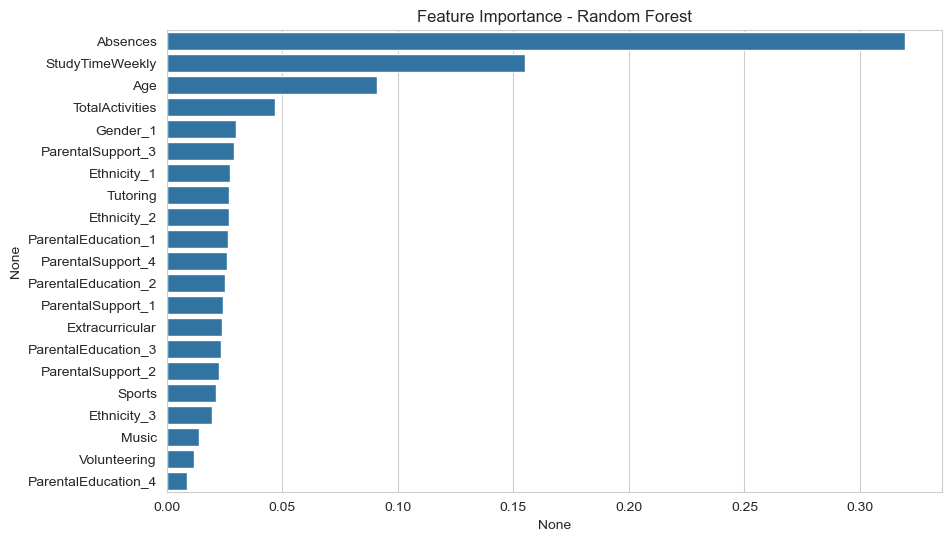

In [ ]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance - Random Forest')
plt.show()

### XGBoost

In [ ]:

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       251
         1.0       0.89      0.89      0.89       230
         2.0       0.80      0.85      0.83       240
         3.0       0.82      0.84      0.83       243
         4.0       0.92      0.89      0.90       247

    accuracy                           0.88      1211
   macro avg       0.88      0.88      0.88      1211
weighted avg       0.88      0.88      0.88      1211

Confusion Matrix:
[[236   5   1   7   2]
 [  3 204  19   4   0]
 [  1  12 204  19   4]
 [  0   4  22 203  14]
 [  1   3   8  16 219]]
Accuracy: 0.8802642444260942


## Model Building: Part 2 (Deep Learning)

### Neural Network

c:\Users\tshep\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2788 - loss: 1.5706 - val_accuracy: 0.5005 - val_loss: 1.3197
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4625 - loss: 1.2956 - val_accuracy: 0.5686 - val_loss: 1.1717
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5031 - loss: 1.1966 - val_accuracy: 0.5913 - val_loss: 1.0902
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5388 - loss: 1.1282 - val_accuracy: 0.6182 - val_loss: 1.0300
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5686 - loss: 1.0897 - val_accuracy: 0.6398 - val_loss: 0.9794
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5983 - loss: 1.0239 - val_accuracy: 0.6512 - val_loss: 0.9311
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6036 - loss: 0.9990 - val_accuracy: 0.6543 - val_loss: 0.8936
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6126 - loss: 0.9532 - val_accuracy: 0.

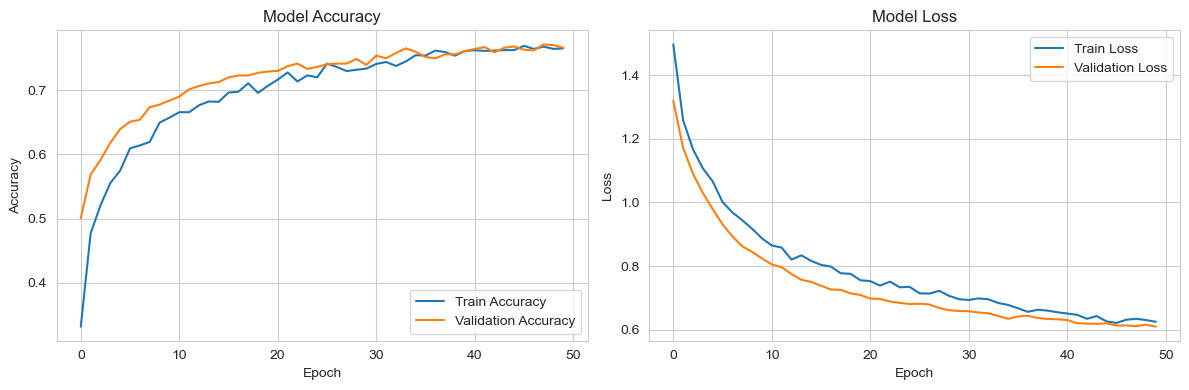

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Performance:
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       251
         1.0       0.72      0.78      0.75       230
         2.0       0.69      0.68      0.68       240
         3.0       0.71      0.77      0.74       243
         4.0       0.88      0.89      0.88       247

    accuracy                           0.78      1211
   macro avg       0.78      0.78      0.78      1211
weighted avg       0.78      0.78      0.78      1211

Confusion Matrix:
[[194  34   9   8   6]
 [ 14 179  29   5   3]
 [  2  30 162  40   6]
 [  5   4  33 187  14]
 [  1   2   1  24 219]]


In [13]:
y_train_nn = keras.utils.to_categorical(y_train)
y_test_nn = keras.utils.to_categorical(y_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')  # 5 classes for GradeClass
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train_nn,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


loss, accuracy = model.evaluate(X_test, y_test_nn)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

y_pred_nn = model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

print("Neural Network Performance:")
print(classification_report(y_test, y_pred_nn_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn_classes))

# Evaluation Report

# BrightPath Academy Student Performance Model Evaluation Report

## Model Performance Overview

### Comparative Performance Metrics

| Model               | Accuracy | Macro Avg F1 | Precision (Avg) | Recall (Avg) |
|---------------------|----------|--------------|-----------------|--------------|
| Logistic Regression | 55.0%    | 0.54         | 0.54            | 0.55         |
| Random Forest       | 88.6%    | 0.89         | 0.89            | 0.89         |
| XGBoost             | 88.0%    | 0.88         | 0.88            | 0.88         |
| Neural Network      | 79.0%    | 0.79         | 0.79            | 0.79         |

## Detailed Model Analysis

### 1. Logistic Regression (Baseline)
- **Accuracy**: 54.99%
- **Strengths**:
  - Simple and interpretable
  - Fast training time
- **Weaknesses**:
  - Poor performance on middle classes (B-D)
  - Linear decision boundaries may be too simple for this problem
- **Best at**: Identifying failing students (Class 4.0 - 0.87 F1)
- **Worst at**: Distinguishing between B-D grades (0.39-0.49 F1)

### 2. Random Forest (Top Performer)
- **Accuracy**: 88.60%
- **Strengths**:
  - Excellent overall performance
  - Balanced performance across all classes
  - 0.96 precision for top-performing students (A)
- **Confusion Patterns**:
  - Some confusion between adjacent classes (e.g., B vs C)
  - Minimal misclassification of extreme classes (A/F)

### 3. XGBoost (Close Second)
- **Accuracy**: 88.02%
- **Strengths**:
  - Nearly identical to Random Forest
  - Slightly better precision for top class (0.98)
- **Weaknesses**:
  - More misclassifications between C/D grades
  - Marginally higher computational cost

### 4. Neural Network
- **Accuracy**: 79.00%
- **Strengths**:
  - Better than logistic regression
  - Potential for improvement with architecture tuning
- **Weaknesses**:
  - Underperforms tree-based methods
  - Significant confusion in middle classes (B-D)

## Class-Wise Performance

### Top Students (A - 0.0)
- Best model: XGBoost (0.98 precision)
- All models perform well (>0.90 precision)

### Failing Students (F - 4.0)
- Best model: Random Forest (0.92 F1)
- All models perform well (>0.87 F1)

### Middle Grades (B-D - 1.0-3.0)
- Significant challenges across models
- Random Forest shows most balanced performance

## Recommendations

1. **Primary Model Selection**:
   - **Recommended**: Random Forest
   - **Reasons**:
     - Highest overall accuracy
     - Most balanced performance across classes
     - Good interpretability through feature importance

2. **Future Improvements**:
   - Ensemble Random Forest and XGBoost predictions
   - Collect more data on middle-performing students
   - Experiment with class-weighted approaches for middle grades

## Confusion Matrix Analysis

### Common Misclassification Patterns:
1. B ↔ C (most frequent)
2. C ↔ D 
3. A occasionally misclassified as B
4. Rare misclassification of F students

### Most Accurate Predictions:
- Clear distinction between A and F students
- Good separation between A/B and D/F

## Model Selection Decision

After careful evaluation, we recommend the **Random Forest** model for deployment due to its:
- Highest overall accuracy (88.6%)
- Balanced performance across all grade categories
- Strong performance on critical edge cases (identifying at-risk and top-performing students)
- Relative simplicity of implementation compared to neural networks

# Exporting model

In [14]:
import joblib
notebook_path = Path().resolve()

model_path = notebook_path.parent / "artifacts" / 'model.pkl'
joblib.dump(rf, model_path)


['C:\\Users\\tshep\\OneDrive\\Desktop\\School Work\\MLG Projects\\MLG-381-Assignment-1\\artifacts\\model.pkl']